In [43]:
from numpy import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [44]:
dataset = pd.read_csv('finaldataset.csv')
dataset

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,Label
0,-0.263502,-0.167903,-0.446342,-0.005728,0.039776,0.011514,0.037622,-0.041895,-0.041791,0.072465,...,0.000063,-0.000136,0.000141,-0.000093,0.000126,-3.975933e-06,0.000629,-0.000012,-0.000010,0
1,-0.538172,0.767607,0.328654,-0.473975,0.148248,-0.063536,0.449899,-0.005152,-0.011905,-0.200623,...,0.000016,0.000295,-0.001125,0.000740,0.000209,-5.568686e-07,0.000184,-0.000019,-0.000048,0
2,-0.598868,0.871351,0.480035,-0.522922,0.243959,0.172053,0.179860,-0.021183,-0.054757,-0.028758,...,0.000576,-0.000865,0.003551,-0.002204,-0.000963,-1.324140e-05,0.000099,0.000035,0.000003,0
3,-0.269532,-0.167819,-0.446780,-0.003435,0.051544,0.005336,0.032856,-0.031816,-0.043031,0.066463,...,0.000061,-0.000086,0.000459,-0.000174,-0.000378,1.344395e-05,0.000765,-0.000027,0.000013,0
4,1.301458,1.493234,0.443243,-0.585408,0.526601,0.436103,0.073433,0.140542,-0.157768,0.095442,...,-0.002067,0.002237,0.002377,-0.000196,-0.003152,2.844513e-05,-0.000816,-0.000008,0.000609,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.077835,0.528904,-0.638154,-0.162049,0.005191,0.733870,0.000879,-0.048069,0.634075,-0.203996,...,0.002381,0.000581,0.000115,0.001120,-0.003417,2.356347e-06,0.002237,-0.000023,-0.000235,1
59996,-0.267291,-0.167952,-0.447170,-0.004093,0.047140,0.008548,0.035052,-0.036177,-0.042960,0.070113,...,0.000014,-0.000077,0.000515,-0.000204,-0.000874,1.033951e-05,0.001310,-0.000026,0.000012,0
59997,0.084310,-0.727216,0.303984,-0.043225,-0.343127,0.157525,0.042986,-0.117888,-0.077339,-0.113971,...,-0.003512,0.005160,0.001533,0.000776,0.004196,-2.853988e-05,-0.001357,0.000005,0.000051,0
59998,-0.249318,-0.168080,-0.445541,-0.010482,0.009916,0.028458,0.048470,-0.068136,-0.038032,0.088134,...,-0.000114,-0.000197,-0.000635,0.000170,0.000311,-4.528510e-05,0.001228,-0.000025,-0.000066,0


In [45]:
X = dataset.drop('Label', axis=1)    
Y = dataset['Label']

In [46]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Label encoding for categorical data (if needed)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

Y = to_categorical(y_encoded)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
Xtrain = np.array(X_train)
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtest = np.array(X_test)
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))


In [49]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
# Define early stopping and learning rate scheduler callbacks
initial_learning_rate = 0.001
def lr_schedule(epoch):
    return initial_learning_rate * (0.1 ** (epoch // 10))

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lr_schedule)

# Define the rest of your callbacks
my_callbacks = [
    ModelCheckpoint(filepath='cnnlstm.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max'),
    early_stopping,
    lr_scheduler
]
model = Sequential()

# Add Convolutional and MaxPooling Layers with L2 Regularization
model.add(Conv1D(64, 3, padding="same", input_shape=(Xtrain.shape[1], 1), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Conv1D(64, 3, padding="same", activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, 3, padding="same", activation='relu', kernel_regularizer=l2(0.001)))
model.add(Conv1D(128, 3, padding="same", activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling1D(pool_size=2))

# Add Batch Normalization
model.add(BatchNormalization())

# Add LSTM layer with L2 Regularization
model.add(LSTM(units=100, return_sequences=False, dropout=0.1, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Add dropout to reduce overfitting

# Add Dense layer with L2 Regularization
model.add(Dense(units=2, activation='softmax', kernel_regularizer=l2(0.01)))  

# Compile the model with a custom learning rate schedule
opt = Adam(learning_rate=initial_learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 50, 64)            256       
                                                                 
 conv1d_17 (Conv1D)          (None, 50, 64)            12352     
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 25, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_18 (Conv1D)          (None, 25, 128)           24704     
                                                                 
 conv1d_19 (Conv1D)          (None, 25, 128)           49280     
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 12, 128)           0         
 g1D)                                                 

In [50]:
history = model.fit(Xtrain, y_train, epochs=50, batch_size=64, validation_data=(Xtest, y_test), callbacks=my_callbacks)

Epoch 1/50
750/750 [==============================] - ETA: 0s - loss: 0.4379 - accuracy: 0.9268   
Epoch 1: val_accuracy improved from -inf to 0.88933, saving model to cnnlstm.h5
750/750 [==============================] - 16s 17ms/step - loss: 0.4379 - accuracy: 0.9268 - val_loss: 0.4098 - val_accuracy: 0.8893 - lr: 0.0010
Epoch 2/50
750/750 [==============================] - ETA: 0s - loss: 0.1914 - accuracy: 0.9443 
Epoch 2: val_accuracy improved from 0.88933 to 0.94917, saving model to cnnlstm.h5
750/750 [==============================] - 12s 17ms/step - loss: 0.1914 - accuracy: 0.9443 - val_loss: 0.1572 - val_accuracy: 0.9492 - lr: 0.0010
Epoch 3/50
750/750 [==============================] - ETA: 0s - loss: 0.1713 - accuracy: 0.9455 
Epoch 3: val_accuracy did not improve from 0.94917
750/750 [==============================] - 12s 16ms/step - loss: 0.1713 - accuracy: 0.9455 - val_loss: 0.3519 - val_accuracy: 0.8899 - lr: 0.0010
Epoch 4/50
750/750 [==============================] - E

In [51]:
model.save('model.h5')

In [52]:
history_dict = history.history

val_accc = history_dict.get('val_accuracy') 

train_accc = history_dict.get('accuracy') 
val_losss = history_dict.get('val_loss')   
losss = history_dict.get('loss')          

threshold = 0.70
history_epochs = []
loss = []
val_loss = []
accuracy = []
val_accuracy = []

for i, acc in enumerate(val_accc):
    if acc >= threshold:
        loss.append(losss[i])
        val_loss.append(val_losss[i])
        accuracy.append(train_accc[i])
        val_accuracy.append(acc)
        
       

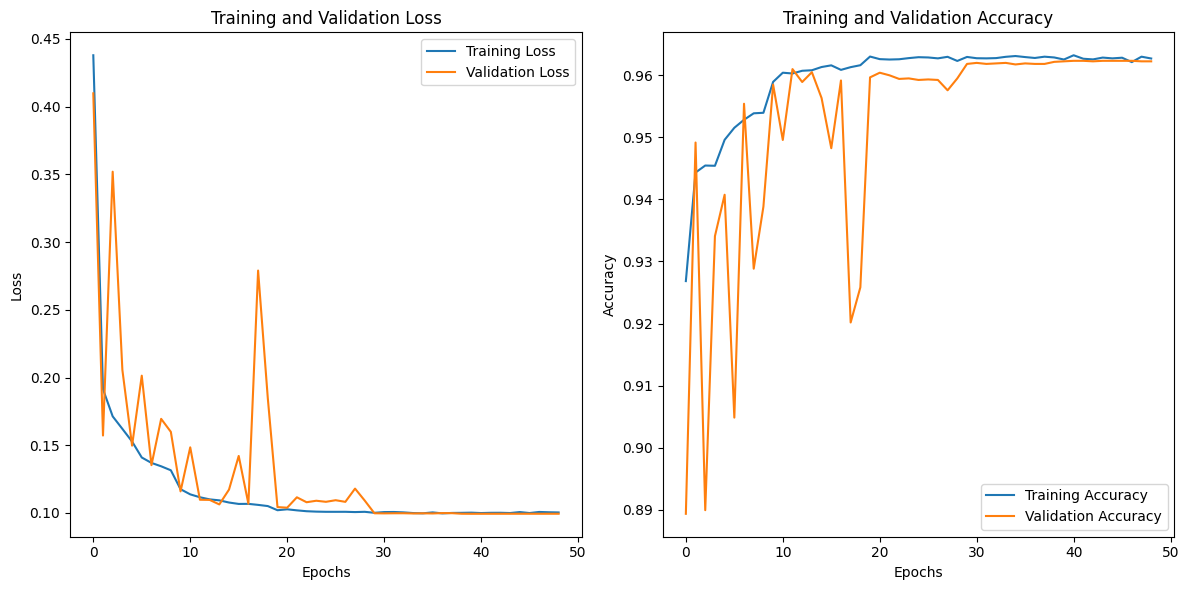

In [53]:
import matplotlib.pyplot as plt



# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)  # Subplot for accuracy
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
